### Reading data -> Annex 3 Inspection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
data = pd.read_excel('./Annex_3_inspection.xlsx')
# Verifying that the code has been correctly loaded
print(data.head())

                     Product                            Comments  Status
0  Standard polystyrene case  Width measurement \ndoes not match     NaN
1  Standard polystyrene case  Width measurement \ndoes not match     NaN
2  Standard polystyrene case              Width does \nnot match     NaN
3  Standard polystyrene case              Width does \nnot match     NaN
4  Standard polystyrene case              Width does \nnot match     NaN


In [6]:
# The column to be anlizar of the xlsx is -> Comments
comments_column = 'Comments'

#Calculate the frequency of the values in the selected column
frequency = data[comments_column].value_counts()
frequency = frequency.sort_values(ascending=False)

# # Calculate the frequency of the values in the selected column.
frequency_response = data[comments_column].value_counts()
frequency_question = data[comments_column].value_counts()

# Calculate the cumulative frequency
accumulated_frecuency = frequency.cumsum() / frequency.sum() * 100

# Pareto of Standar Polystyrene case (comments)

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


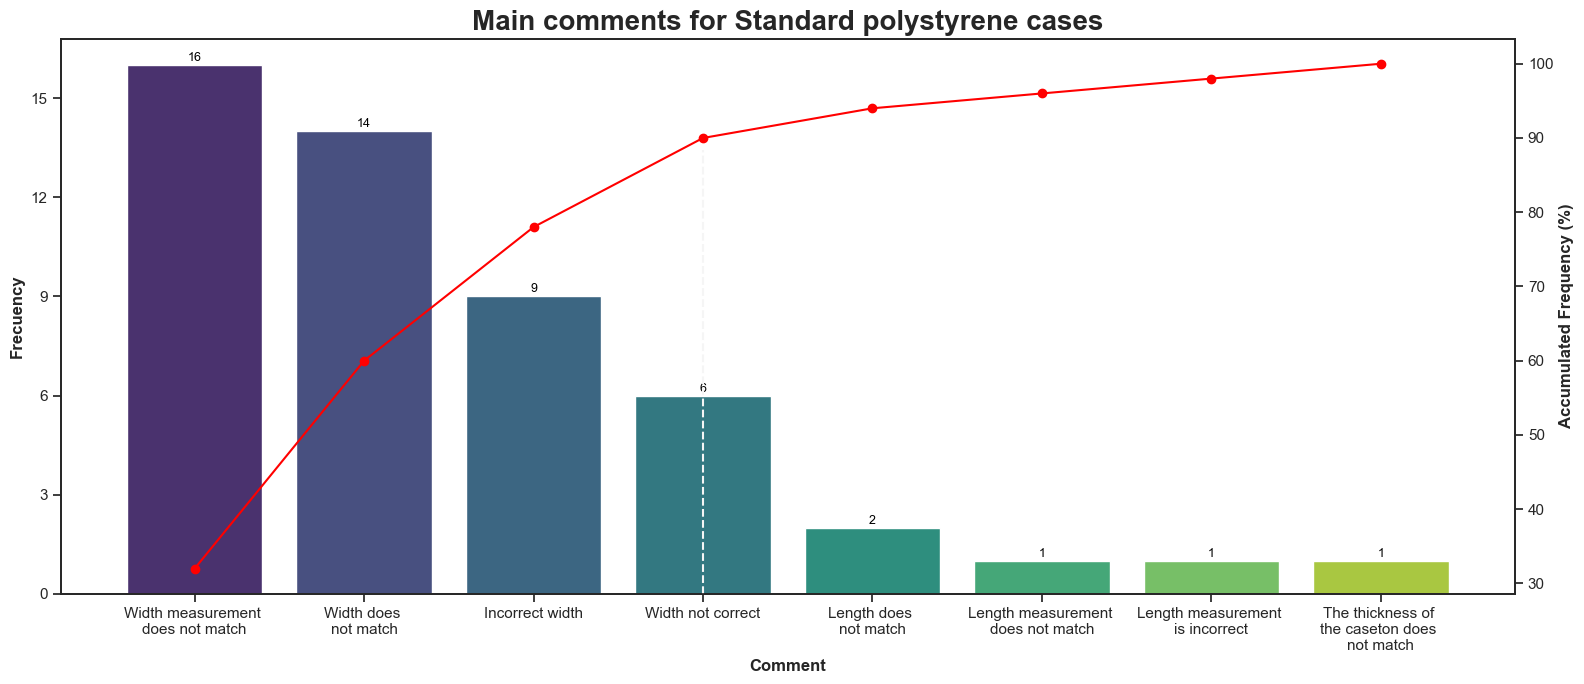

In [7]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 7))
sns.set_theme(style="ticks")
# Bar chart / frequencies
sns.barplot(x=frequency.index, y=frequency.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Frecuency', fontweight='bold', size=12)

# Set the interval on the y-axis
ax1.yaxis.set_major_locator(ticker.MultipleLocator(3))


# Line graph (right) for cumulative frequency
ax2 = ax1.twinx()
ax2.plot(accumulated_frecuency.index, accumulated_frecuency.values, color='red', marker='o')
ax2.set_ylabel('Accumulated Frequency (%)', fontweight='bold', size=12)

# Add dotted line at 80% of cumulative frequency
point_80 = accumulated_frecuency[accumulated_frecuency >= 80].index[0]
plt.axvline(x=point_80, color='whitesmoke', linestyle='--', ymin=0, ymax=80/100, label='80% Accumulated Frequency')

# Format settings
ax1.set_xlabel('Comment', fontweight='bold', size=12)
ax1.set_title('Main comments for Standard polystyrene cases', fontweight='bold', size=20)

# Rotate labels vertically on the x-axis
plt.xticks(rotation='vertical')

# Rotate labels vertically on the x-axis
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Cost analysis

In [22]:
df = pd.read_csv('./Annex_3_inspection_defects.csv')
# Verifying that the code has been correctly loaded
print(df.head())

                     Product                            Comments  Status  \
0  Standard polystyrene case  Width measurement \ndoes not match     NaN   
1  Standard polystyrene case  Width measurement \ndoes not match     NaN   
2  Standard polystyrene case              Width does \nnot match     NaN   
3  Standard polystyrene case              Width does \nnot match     NaN   
4  Standard polystyrene case              Width does \nnot match     NaN   

  Type of defect  Cost  
0          Width   200  
1          Width   200  
2          Width   200  
3          Width   200  
4          Width   200  


## Pareto analysis of cost

In [23]:
# Contar las ocurrencias de cada comentario
comment_counts = df['Type of defect'].value_counts()

comment_counts

Type of defect
Width        45
Length        4
Thickness     1
Name: count, dtype: int64

In [30]:
# Contar las ocurrencias de cada tipo de defecto
defect_counts = df['Type of defect'].value_counts()

# Calcular el porcentaje de cada tipo de defecto
df['Percentage'] = (df['Type of defect'].value_counts() / len(df)) * 100

# Ordenar el DataFrame por porcentaje en orden descendente
df = df.sort_values(by='Percentage', ascending=False)

# Calcular el porcentaje acumulado
df['Cumulative Percentage'] = df['Percentage'].cumsum()
df['Percentage'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: Percentage
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 532.0 bytes
